In [1]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------- ----------- 7.9/11.1 MB 50.0 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 40.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import sklearn

sklearn.__version__

'1.6.1'

In [4]:
df = pd.read_csv('../DATA/salaries_experience.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
# Fase de modelado:
 # aprendizaje superisado
 # Datos de entrada X
 # Datos de salida Y
 # Algoritmo que aprenda los datos y la relación que tiene cada entrada X con cada salida Y
 # Si el algoritmo aprende luego puede predecir nuevas salidas y ante nuevas entradas X
 
X = df[["YearsExperience"]] #doble corchete para que sea dataframe (necesario), no una serie que es lo que devuelve con un solo corchete
# type(X) es un dataframe
X[:5]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [10]:
y = df["Salary"] # Variable que queremos predecir/modelar, puede ser una serie o un array de numpy de una dimensión
y[:5]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression

In [16]:
# Instanciar el algoritmo de regresión lineal
model = LinearRegression()

# Entrenar el algoritmo
model.fit(X, y)

# el punto en el eje y donde la recta cruza cuando x = 0
print("Intercept: (w0 / b0):", model.intercept_) # sería el punto donde corta al eje y
# tasa de cambio de y por cada unidad de cambio en x: por cada año de experiencia el salario aumenta en 9449€ (en este caso)
print("Coeficiente (w1 / b1):", model.coef_)

Intercept: (w0 / b0): 25792.20019866871
Coeficiente (w1 / b1): [9449.96232146]


In [20]:
# Realizar una predicción sobre cualquier cantidad de años de experiencia
X_new = pd.DataFrame([5.78, 2.43, 9.77], columns=["YearsExperience"])
X_new

,YearsExperience
0,5.78
1,2.43
2,9.77


In [22]:
X_new["Salary_pred"] = model.predict(X_new)

In [23]:
X_new

,YearsExperience,Salary_pred
0,5.78,80412.982417
1,2.43,48755.608640
2,9.77,118118.332079


In [24]:
# De forma manual, se hace de la siguiente forma. El método .predict() lo hace de forma automátical, más rápida

experience_years = 5.78
salary = model.intercept_ + model.coef_ * experience_years
salary

array([80412.98241668])

In [26]:
experience_years = 9.77
salary = model.intercept_ + model.coef_ * experience_years
salary

array([118118.33207928])

In [27]:
# Para evitar el warning (que da al ejecutar esta celda) lo ideal es pasarle un DataFrame con las mismas columnas con el que se entrenó
# Sin DataFrame se es más propenso a error
print(model.predict([[5.78]])) # Aquí le pasamos una nueva X
print(model.predict([[9.77]]))

[80412.98241668]
[118118.33207928]


c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\carme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
model.predict(pd.DataFrame([5.78, 2.43, 9.77], columns=["YearsExperience"]))

array([ 80412.98241668,  48755.6086398 , 118118.33207928])

In [30]:
y_pred = model.predict(X)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [31]:
df["Salary_pred"] = model.predict(X)
df.head()

,YearsExperience,Salary,Salary_pred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='YearsExperience', ylabel='Salary'>

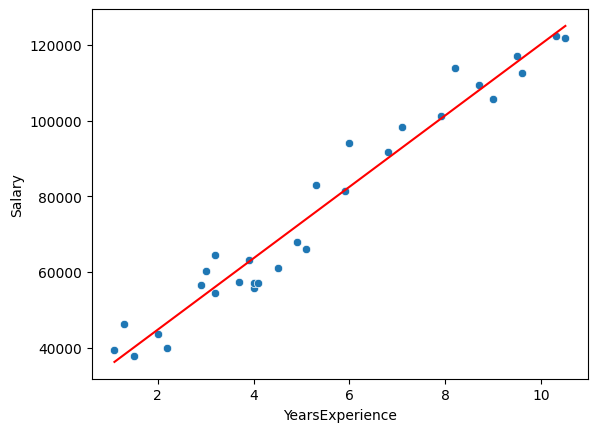

In [37]:
# plt.scatter(df["YearsExperience"], df["Salary"])
sns.scatterplot(df, x= "YearsExperience", y ="Salary")
sns.lineplot(df, x="YearsExperience", y="Salary_pred", c="r") #la c="r" es para dibujar la recta de la regresión

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [44]:
# Error absoluto medio se calcula de la siguiente manera (en este caso, hay un error de unos 4600€ en las predicciones de media)
# mean_absolut_error(y, y_pred)
# Cuanto más cercano a 0 mejor, porque indica que hay menos error
mean_absolute_error(df["Salary"], df["Salary_pred"])

4644.2012894435375

In [50]:
# Para penalización de errores muy malas, con errores muy grandes. Por ejemplo si el modelo se ha equivocado mucho, en dos o tres predicciones, las penaliza más que la MAE
# Raíz error cuadrático medio: RMSE (Root mean squared error)
root_mean_squared_error(y, y_pred)

5592.043608760662

In [48]:
# calidad global: qué tan bien el modelo explica la variabilidad de los datos
# De 0 a 1
# Cuanto más cercano a 1 mejor:
r2_score(y, y_pred)

0.9569566641435086

In [ ]:
# Regresión lineal múltiple: utiliza variaos datos de entrada X, por ejemplo varias columnas:

# X = df[["YearsExperience", "study_level", "años_cotizados", "edad", "city"]]